# Business Intelligence Showcase

## Automated Ride Attendance Summary and Analysis

### Before
Originally manually parsing through **20 spreadsheets** with **32 sheets each** to get only a couple of data points for an end-of-year summary.

Endless, mindless clicking, sheet after sheet, coping and pasting into a different file... One by one. It would take **days to complete!**

### Now
It takes **30 seconds**. Click a button to read and organize the data. Another 2 seconds to put it into a formatted summary sheet. You just saved a week of mindless, error prone, painful work.

It doesn't stop there. Now you have all the relevant data is neatly organized in rows and columns! Sure, they are difficult to read for the naked eye, but you can **create beautiful graphs** from them.

Did you ever want to figure out **what times are most popular in the summer on each ride?**

#### Click in the above menu     ( Cell > Run All )

In [4]:
import warnings
# numpy, a pandas dependecy is having a bit of an annoying warning at the moment
warnings.filterwarnings("ignore", message="numpy.dtype size changed")

import pandas as pd
from ride_throughput_parser import ride_throughput_parser as parser

## Excerpt of the organized data

Days of tedious work, now seconds.
This is the only part that takes longer than 2 seconds to run.

In [5]:
df = parser.run()
df.head()
df['ride_name'] = df['ride_name'].astype('category')
ride_names = df['ride_name'].cat.categories

## Check the plots below
2 years worth of data being displayed in a friendly fashion.

                   ride_name                date  throughput
0   Amazing Flying Elephants 2017-04-14 10:00:00         NaN
1   Amazing Flying Elephants 2017-04-14 11:00:00       116.0
2   Amazing Flying Elephants 2017-04-14 12:00:00       200.0
3   Amazing Flying Elephants 2017-04-14 13:00:00       234.0
4   Amazing Flying Elephants 2017-04-14 14:00:00       241.0
5   Amazing Flying Elephants 2017-04-14 15:00:00       245.0
6   Amazing Flying Elephants 2017-04-14 16:00:00       235.0
7   Amazing Flying Elephants 2017-04-14 17:00:00       228.0
8   Amazing Flying Elephants 2017-04-14 18:00:00       244.0
9   Amazing Flying Elephants 2017-04-14 19:00:00       238.0
10  Amazing Flying Elephants 2017-04-14 20:00:00       197.0
11  Amazing Flying Elephants 2017-04-14 21:00:00         NaN
12  Amazing Flying Elephants 2017-04-14 22:00:00         NaN
13  Amazing Flying Elephants 2017-04-14 23:00:00         NaN


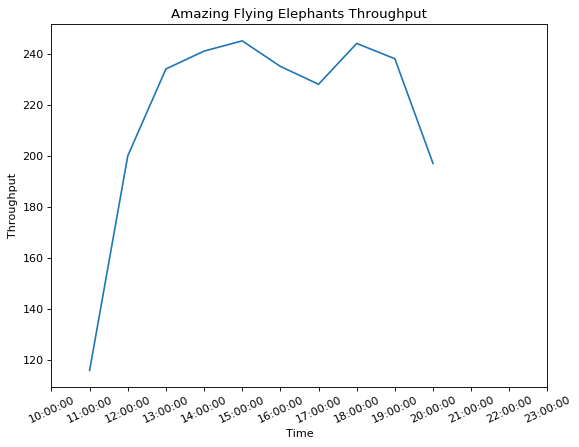

In [6]:
from datetime import datetime

import matplotlib.pyplot as plt
import ipywidgets as widgets

from IPython.display import display

from matplotlib.pyplot import figure

def date_range(df, begin, end):
    return df[(df['date'] > pd.Timestamp(begin)) & (df['date'] <= pd.Timestamp(end))]

def day_data(df, date):
    return df[df['date'] == date]

def plot_dates(data):
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    times = [str(time) for time in data['date'].map(pd.Timestamp.time)]
    plt.plot(times, data['throughput'])
    plt.xlim([min(times), max(times)])
    plt.title(data['ride_name'][0] + ' Throughput')
    plt.xticks(rotation=25)
    plt.xlabel('Time')
    plt.ylabel('Throughput')
    plt.show()

def mine(start_date, end_date, ride_name):
    filtered = date_range(df, start_date, end_date)
    data = filtered[filtered['ride_name'] == ride_name]
    print(data)
    plot_dates(data)
    

all_dates = df['date'].map(pd.Timestamp.date).unique()

start_date = widgets.DatePicker(
    description='Start date',
    value=df['date'].map(pd.Timestamp.date).unique()[0],
    disabled=False
)

end_date = widgets.DatePicker(
    description='End date',
    value=df['date'].map(pd.Timestamp.date).unique()[1],
    disabled=False
)

ride_name = widgets.Dropdown(
    options=[str(name) for name in df['ride_name'].unique()],
    value=df['ride_name'][0],
    description='Ride name:',
    disabled=False,
)

x = widgets.interactive(mine, start_date=start_date, end_date=end_date, ride_name=ride_name)
display(x)

In [52]:
# plot each ride individually for multiple times
def plot_dates(dates=['2017-04-14']):
    for ride_name in ride_names:
        ride = df[df['ride_name'] == ride_name]
        for date in dates:
            (x, y) = daily_data(df['date'].ix['2014-01-01':'2014-02-01'] )
            plt.plot(ride, ride['n'], label=time)
        plt.title(ride_name)
        plt.xticks(rotation=25)
        plt.xlabel('Date')
        plt.legend(bbox_to_anchor=(1.25, 0.8), loc='right')
        plt.show()

def daily_data(df):    
    previous_day = df[0]['date'].day
    daily_data = []
    daily_times = []

    for row in df:
        if row['date'].day == previous_day:
            daily_data.append(row['data_to_plot'])
            daily_times.append(row['date'])

        else:
            plt.plot(daily_times, daily_data)
            previous_day = row['date'].day
            daily_data = []
            daily_times = []

    return (daily_times, daily_data)

# plot each ride individually
# TODO: Not working
def plot_individually(time='11a-12p'):
    for ride_name in ride_names:
        ride = df[df['ride_name'] == ride_name]
        plt.plot(ride['date'], ride[time])
        plt.title(ride_name)
        plt.xticks(rotation=25)
        plt.xlabel('this is the x label (dates)')
        plt.show()
        
# plot each ride individually for multiple times
def plot_dates(dates=['2017-04-14']):
    for ride_name in ride_names:
        ride = df[df['ride_name'] == ride_name]
        for date in dates:
            (x, y) = daily_data(df['date'].ix['2014-01-01':'2014-02-01'] )
            plt.plot(ride, ride['n'], label=time)
        plt.title(ride_name)
        plt.xticks(rotation=25)
        plt.xlabel('Date')
        plt.legend(bbox_to_anchor=(1.25, 0.8), loc='right')
        plt.show()

# plot each ride individually for multiple times
def plot_times(times=['11a-12p']):
    for ride_name in ride_names:
        ride = df[df['ride_name'] == ride_name]
        for time in times:
            plt.plot(ride['date'], ride[time], label=time)
        plt.title(ride_name)
        plt.xticks(rotation=25)
        plt.xlabel('Date')
        plt.legend(bbox_to_anchor=(1.25, 0.8), loc='right')
        plt.show()
        
# plot all rides in one plot
# TODO: Not working
def plot_all(time='11a-12p'):
    for ride_name in ride_names:
        ride = df[df['ride_name'] == ride_name]
        plt.plot(ride['date'], ride[time], label=ride_name)
    plt.title('Rides at ' + time)
    plt.xticks(rotation=25)
    plt.legend(bbox_to_anchor=(2.05, 1), loc='right')
    plt.show()
    
plot_dates()

/home/user/.virtualenvs/data/lib/python3.7/site-packages/ipykernel_launcher.py:48: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


IndexError: index out of bounds

## What other questions can you formulate? What do you want to learn from your data?

- What times are rides more popular?
- What dates are rides more popular?
- Do guests flow from one ride to another throughout the day?
- What attendance can you project for next summer?

### You have the data. Lets paint a picture with it!

## TESTING: Interactive Charting

### QUESTION: On average: Is the horsepower of the cars that accelerate the fastest, larger or smaller?

In [ ]:
from IPython.display import IFrame
IFrame('https://demo.bokehplots.com/apps/crossfilter/', width=1200, height=620)

In [ ]:
from pivottablejs import pivot_ui
pivot_ui(df)